### Week 4: Individual Coding Assignment

Author: Victor Tran

For my individual coding assignment, I would like to revisit a dataset I had looked at for the first week of this class, but was not able to use for my Week 2 assignment because I did not learn about the leading zero dilemma yet and how to use data that has FIPS codes with geodata. The data I will be looking at looks at LIHTC Units in Service: the total number of units in service through the Low Income Housing Tax Credit (LIHTC) program in the city of Los Angeles between 2010-2019. This data comes from the [USC Neighborhood Data for Social Change (NDSC)](https://la.myneighborhooddata.org/2021/06/low-income-housing-tax-credits-lihtc/). I find that this variable is important to look at, especially in the context of fair housing, as it looks at the current geographic distribution of affordable housing that is funded with federal tax credits that is supposed to reduce concentrated poverty in government-subsidized housing. My geodata is from the [Los Angeles GeoHub](https://geohub.lacity.org/datasets/lahub::census-tracts-2010-population/about), showing the census tracts in the City of Los Angeles (based on 2010 population).

### Importing the Data and Conducting Data Exploration

In order to start data exploration, I will need to use the pandas library and load the data I downloaded from the USC Neighborhood Data for Social Change

In [1]:
import pandas as pd

In [2]:
LIHTC = pd.read_csv('data/All Years LIHTC Calculations.csv')

Use the shape function to see the size of the data and start our data exploration

In [3]:
LIHTC.shape

(4986, 5)

I see that this data set has 5 columns and 4986 rows/data entries. I will use the head() function to give me a sample of the first 5 rows in the data set and see what the columns are

In [4]:
LIHTC.head()

,geoid,geoid20,year,tot_units_count,li_units_count
0,1400000US06037101400,6037101400,2019,46,45
1,1400000US06037103102,6037103102,2019,82,81
2,1400000US06037104105,6037104105,2019,480,475
3,1400000US06037104108,6037104108,2019,49,48
4,1400000US06037104703,6037104703,2019,64,62


It appears that geoid and geoid20 can be used as our geographic unique identifier. I will then use the .info() function to see the data types of each column.

In [7]:
LIHTC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4986 entries, 0 to 4985
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   geoid            4986 non-null   object
 1   geoid20          4986 non-null   int64 
 2   year             4986 non-null   int64 
 3   tot_units_count  4986 non-null   int64 
 4   li_units_count   4986 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 194.9+ KB


The Geoid20 column will become our unique identifier, however it is currently an int64 data type. We also see the leading zero dilemna, since there is no beginning 0 in the FIPS code. Upon importing the data, I am looking closer at the FIPS code column that will be the unique identifier down below

In [8]:
LIHTC.geoid20.head()

0    6037101400
1    6037103102
2    6037104105
3    6037104108
4    6037104703
Name: geoid20, dtype: int64

Like in lab, we are running into the leading zero dilemma as the leading zero typically found in the FIPS code is not showing up. In order to fix this issue, I have re-imported the data below and have specified the FIPS column as a string.

In [155]:
LIHTC = pd.read_csv(
    'data/All Years LIHTC Calculations.csv',
    dtype=
    {
        'geoid20':str,
    }
)

Checking the data again to see if the FIPS leading zero has reappeared by using the head() function

In [59]:
LIHTC.head()

,geoid,geoid20,year,tot_units_count,li_units_count
0,1400000US06037101400,6037101400,2019,46,45
1,1400000US06037103102,6037103102,2019,82,81
2,1400000US06037104105,6037104105,2019,480,475
3,1400000US06037104108,6037104108,2019,49,48
4,1400000US06037104703,6037104703,2019,64,62


There is an issue - I am very confused on why that didn't work and geoid20 still does not have a leading 0. Not sure what happened but instead I will add the leading zero into the data manually using excel and reimport the data with an updated GeoFIPS column

In [156]:
LIHTC = pd.read_csv('data/All Years LIHTC Calculations with GeoFIPS.csv')

Examine the newly imported data using the shape and head functions

In [62]:
LIHTC.shape

(5056, 7)

In [63]:
LIHTC.head()


,geoid,Leading Zeros,geoid20,GeoFIPS,year,tot_units_count,li_units_count
0,1400000US06037101400,0.0,6.037101e+09,6.037101e+09,2019.0,46.0,45.0
1,1400000US06037103102,0.0,6.037103e+09,6.037103e+09,2019.0,82.0,81.0
2,1400000US06037104105,0.0,6.037104e+09,6.037104e+09,2019.0,480.0,475.0
3,1400000US06037104108,0.0,6.037104e+09,6.037104e+09,2019.0,49.0,48.0
4,1400000US06037104703,0.0,6.037105e+09,6.037105e+09,2019.0,64.0,62.0


Here, you can see how I added a leading zeros column in the data, combineded it with the data in the geoid20 columns, and created a new GEOFIPS column that now has the full FIPS codes with the leading zero. I will check the datatypes of the new LIHTC dataset down below

In [64]:
LIHTC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5056 entries, 0 to 5055
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   geoid            4986 non-null   object 
 1   Leading Zeros    4986 non-null   float64
 2   geoid20          4986 non-null   float64
 3   GeoFIPS          4986 non-null   float64
 4   year             4986 non-null   float64
 5   tot_units_count  4986 non-null   float64
 6   li_units_count   4986 non-null   float64
dtypes: float64(6), object(1)
memory usage: 276.6+ KB


Again, the GeoFIPS column is a float64 datatype and not an object.string - so I will next reimport the data and have specified the GeoFIPS column as a string

In [67]:
LIHTC = pd.read_csv(
    'data/All Years LIHTC Calculations with GeoFIPS.csv',
    dtype=
    {
        'GeoFIPS':str,
    }
)

Check to see if the data successfully re-imported with the updated data type using the .info() command

In [77]:
LIHTC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5056 entries, 0 to 5055
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   geoid            4986 non-null   object 
 1   Leading Zeros    4986 non-null   float64
 2   geoid20          4986 non-null   float64
 3   GeoFIPS          4986 non-null   object 
 4   year             4986 non-null   float64
 5   tot_units_count  4986 non-null   float64
 6   li_units_count   4986 non-null   float64
dtypes: float64(5), object(2)
memory usage: 276.6+ KB


The GeoFIPS column data type has been updated correctly. I will now define the columns I want to keep that will be useful for my particular research inquiry. In this case, I am only interested in the GeoFIPS and 'li_units_count' columns. These columns include the geographic identifier (by census tract) and the total number of low income units built in LIHTC properties in a particular census tract

In [69]:
columns_to_keep = ['GeoFIPS',
                   'li_units_count']

In [78]:
LIHTCunits = LIHTC[columns_to_keep]

In [79]:
LIHTCunits

,GeoFIPS,li_units_count
0,06037101400,45.0
1,06037103102,81.0
2,06037104105,475.0
3,06037104108,48.0
4,06037104703,62.0
...,...,...
5051,NaN,NaN
5052,NaN,NaN
5053,NaN,NaN
5054,NaN,NaN


I have successfully defined the two columns I want to keep in the new variable LITHCunits. I will start examining this data with commands to produce some introductory/simple statistics, such as the .describe() command.

In [80]:
LIHTCunits['li_units_count'].describe()

count    4986.000000
mean      119.051344
std       121.635817
min         2.000000
25%        42.000000
50%        80.000000
75%       154.000000
max      1142.000000
Name: li_units_count, dtype: float64

Here I see the average number of low-income housing units in LIHTC developments in the census tracts that do have them. I also see that the minimum amount of units is 2 while the maximum is 1,142 units in one particular census tract - which is a very large range. I will now plot the low income units variable as a histogram with 30 bins

<AxesSubplot: ylabel='Frequency'>

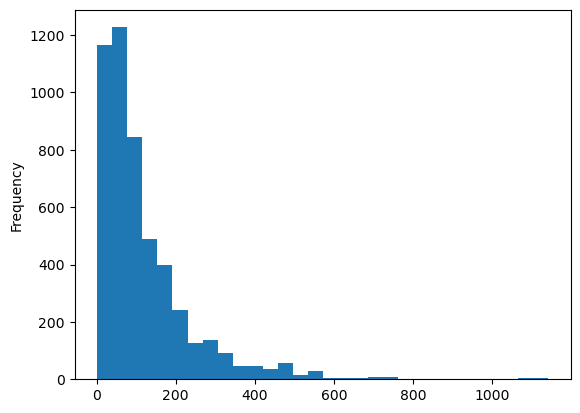

In [73]:
LIHTCunits['li_units_count'].plot.hist(bins=30)

This histogram shows that the large majority of census tracts that do have LIHTC units with low income units typically have low amounts of these units while there are some notable outliers on the higher end - I can also generate a box plot for the same varible below, and see the outliers as well

<AxesSubplot: >

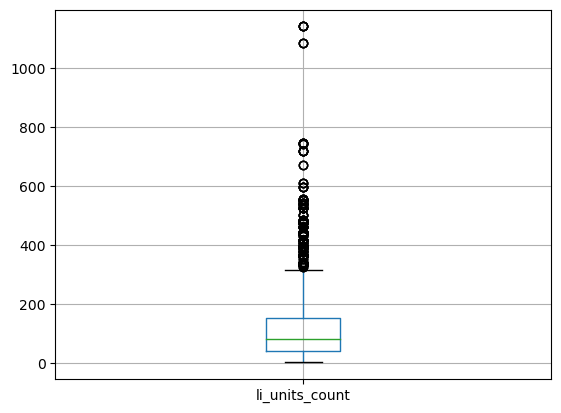

In [105]:
LIHTCunits.boxplot(column=['li_units_count'])

I am curious to see the top 10 census tracts that have the most amount of low income housing units. I can sort the data by this column using the sort_values function

In [152]:
LIHTCunits_sorted = LIHTCunits.sort_values(by='li_units_count',ascending = False)

I have sorted the data and will display the top 10 census tracts. I can also plot these results in a bar chart

In [76]:
LIHTCunits_sorted[['GeoFIPS','li_units_count']].head(10)

,GeoFIPS,li_units_count
715,6.037208e+09,1142.0
1801,6.037208e+09,1142.0
2333,6.037208e+09,1142.0
157,6.037208e+09,1142.0
1262,6.037208e+09,1142.0
2855,6.037208e+09,1142.0
3819,6.037208e+09,1087.0
4689,6.037208e+09,1087.0
3351,6.037208e+09,1087.0
4262,6.037208e+09,1087.0


<AxesSubplot: xlabel='GeoFIPS'>

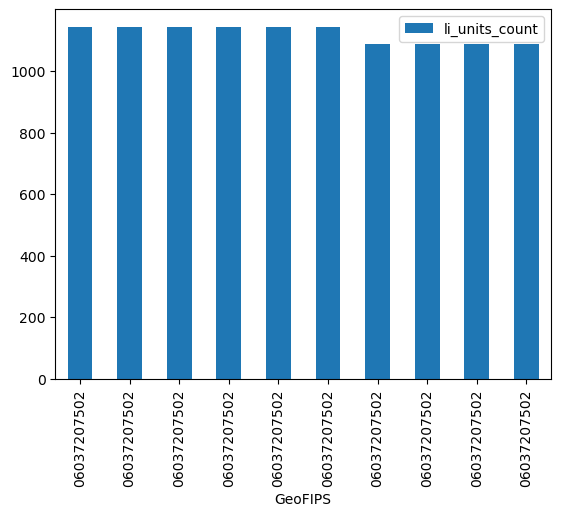

In [157]:
LIHTCunits_sorted.head(10).plot.bar(x='GeoFIPS',
                            y='li_units_count')

### Mapping with GeoPandas

With using Geopandas, I have found a geojson file from the Los Angeles GeoHub that shows all the census tracts in the city of Los Angeles based on the 2010 population. I will need to merge the data and geodata files in order to map the LIHTC data. I will start with importing geopandas and the geodata file I have downloaded

In [153]:
import geopandas as gpd

In [159]:
neighborhoods=gpd.read_file('data/Census_Tracts_2010_Population.geojson')

Open the data and check to see what the columns are

In [160]:
neighborhoods.head()

,OBJECTID,TRACTCE10,POP,LATPOP_D,WHIPOP_D,BLAPOP_D,AMIPOP_D,ASIPOP_D,HPIPOP_D,OTHPOP_D,...,ASIVAP_D,HPIVAP_D,OTHVAP_D,MMRVAP_D,H0010001,H0010002,H0010003,TOOLTIP,NLA_URL,geometry
0,1,101110,4731,1324,2656,74,14,486,4,30,...,396,4,22,108,1734,1641,93,Tract: 1011.10\nTotal Population: 4731,navigatela/reports/census_tracts_2010.cfm?PK=1...,"POLYGON ((-118.29420 34.26289, -118.29435 34.2..."
1,2,101122,3664,575,2437,26,4,495,1,10,...,426,1,8,81,1369,1325,44,Tract: 1011.22\nTotal Population: 3664,navigatela/reports/census_tracts_2010.cfm?PK=1...,"POLYGON ((-118.28996 34.27813, -118.28991 34.2..."
2,3,101210,5990,2219,2890,183,6,448,3,5,...,390,2,3,194,2317,2150,167,Tract: 1012.10\nTotal Population: 5990,navigatela/reports/census_tracts_2010.cfm?PK=1...,"POLYGON ((-118.29212 34.25071, -118.29191 34.2..."
3,4,101220,3363,1272,1662,36,11,272,2,3,...,219,2,2,76,1317,1246,71,Tract: 1012.20\nTotal Population: 3363,navigatela/reports/census_tracts_2010.cfm?PK=1...,"POLYGON ((-118.27946 34.24757, -118.27619 34.2..."
4,5,101300,4199,503,3190,41,5,317,3,7,...,272,2,6,94,1582,1542,40,Tract: 1013.00\nTotal Population: 4199,navigatela/reports/census_tracts_2010.cfm?PK=1...,"POLYGON ((-118.26542 34.25547, -118.26545 34.2..."


Note that the data does have a census tract column. Since there is also a geography column, we can plot this and see how the data looks - it should show the census tracts that encompass the city of Los Angeles

<AxesSubplot: >

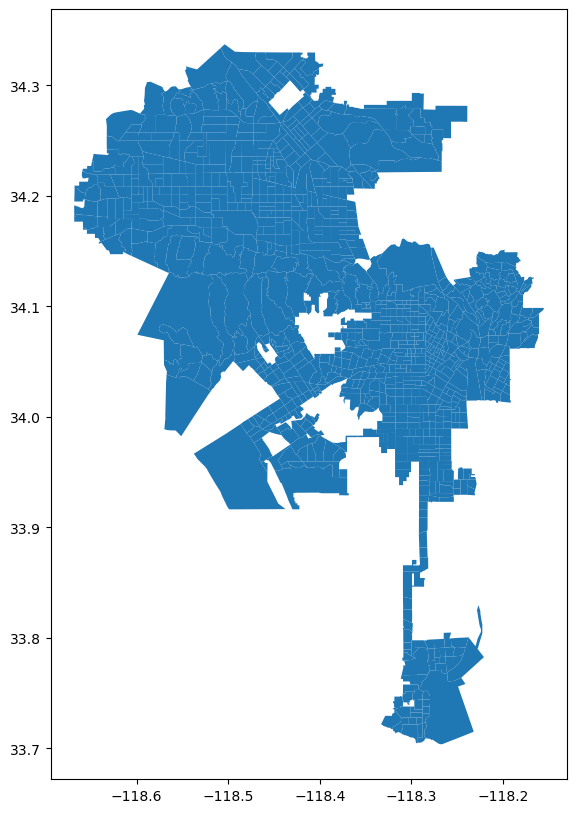

In [82]:
neighborhoods.plot(figsize=(12,10))

Since I really only care about the FIPS and geometry columns in this data, I can subset the data to only see the 'TRACTCE10' and 'geometry' columns

In [164]:
neighborhoods = neighborhoods[['TRACTCE10','geometry']]
neighborhoods.head()

,TRACTCE10,geometry
0,101110,"POLYGON ((-118.29420 34.26289, -118.29435 34.2..."
1,101122,"POLYGON ((-118.28996 34.27813, -118.28991 34.2..."
2,101210,"POLYGON ((-118.29212 34.25071, -118.29191 34.2..."
3,101220,"POLYGON ((-118.27946 34.24757, -118.27619 34.2..."
4,101300,"POLYGON ((-118.26542 34.25547, -118.26545 34.2..."


Since the 'TRACTCE10' FIPS code column currently is missing the state and county code, I need to add them and create a new GeoFIPS column

In [165]:
neighborhoods['GeoFIPS'] ='06' + '037' + neighborhoods['TRACTCE10']

I will check to see if the output is correct with a new GeoFIPS column

In [166]:
neighborhoods.head()

,TRACTCE10,geometry,GeoFIPS
0,101110,"POLYGON ((-118.29420 34.26289, -118.29435 34.2...",06037101110
1,101122,"POLYGON ((-118.28996 34.27813, -118.28991 34.2...",06037101122
2,101210,"POLYGON ((-118.29212 34.25071, -118.29191 34.2...",06037101210
3,101220,"POLYGON ((-118.27946 34.24757, -118.27619 34.2...",06037101220
4,101300,"POLYGON ((-118.26542 34.25547, -118.26545 34.2...",06037101300


After cleaning up my data, I have the LIHTC data and the geo data from the Los Angeles GeoHub - with both having the correct GeoFIPS code. I will now merge the data and geodata together. I will create a new dataframe based on this join down below

In [90]:
LIHTCneighborhoods=neighborhoods.merge(LIHTCunits,on="GeoFIPS")

Check to see if the merge was successful

In [91]:
LIHTCneighborhoods.head()

,TRACTCE10,geometry,GeoFIPS,li_units_count
0,101400,"POLYGON ((-118.27236 34.23268, -118.27232 34.2...",06037101400,45.0
1,101400,"POLYGON ((-118.27236 34.23268, -118.27232 34.2...",06037101400,45.0
2,101400,"POLYGON ((-118.27236 34.23268, -118.27232 34.2...",06037101400,45.0
3,101400,"POLYGON ((-118.27236 34.23268, -118.27232 34.2...",06037101400,45.0
4,101400,"POLYGON ((-118.27236 34.23268, -118.27232 34.2...",06037101400,45.0


In [97]:
LIHTCneighborhoods.tail()

,TRACTCE10,geometry,GeoFIPS,li_units_count
2614,980015,"POLYGON ((-118.29750 33.78208, -118.29751 33.7...",06037980015,73.0
2615,980015,"POLYGON ((-118.29750 33.78208, -118.29751 33.7...",06037980015,73.0
2616,980015,"POLYGON ((-118.29750 33.78208, -118.29751 33.7...",06037980015,73.0
2617,980015,"POLYGON ((-118.29750 33.78208, -118.29751 33.7...",06037980015,73.0
2618,980015,"POLYGON ((-118.29750 33.78208, -118.29751 33.7...",06037980015,73.0


### Creating Choropleth Maps in Geopandas

I can create choropleth maps for the li_units_count column in geopandas, using three different color schemes - natural breaks, equal intervals, and quantiles. Each color scheme will yield different effects and visual impacts so we can later decide which scheme best conveys our data/trends in the most impactful way

<AxesSubplot: >

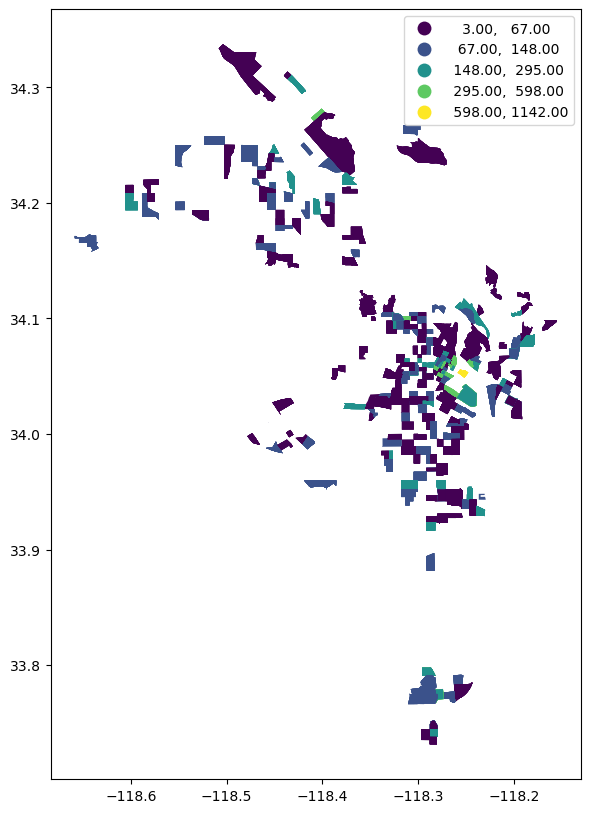

In [111]:
LIHTCneighborhoods.plot(figsize=(12,10),
                 column='li_units_count',
                 legend=True, 
                 scheme='NaturalBreaks')

<AxesSubplot: >

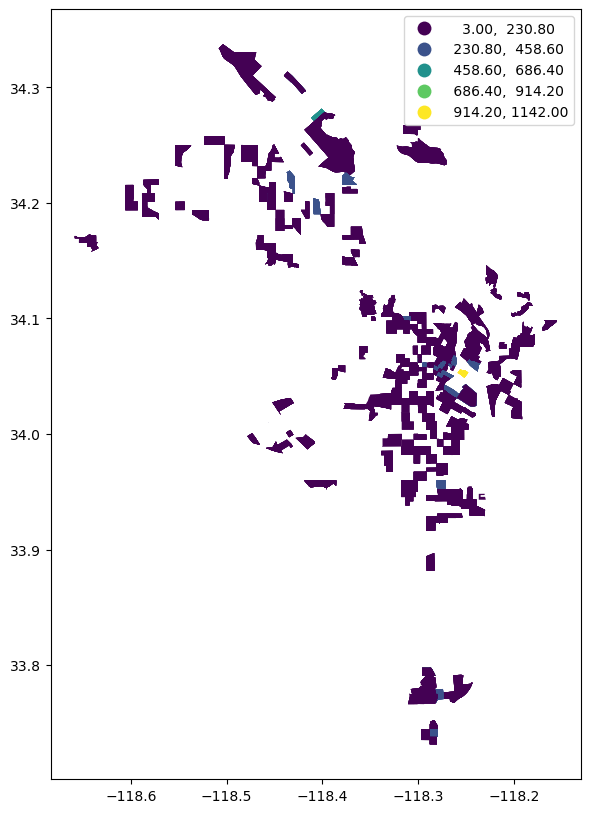

In [112]:
LIHTCneighborhoods.plot(figsize=(12,10),
                 column='li_units_count',
                 legend=True, 
                 scheme='equal_interval')

<AxesSubplot: >

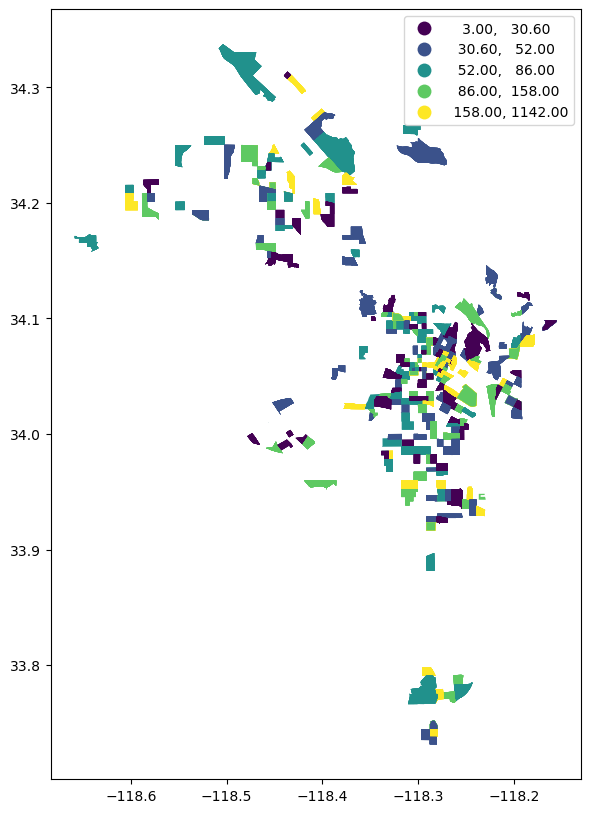

In [110]:
LIHTCneighborhoods.plot(figsize=(12,10),
                 column='li_units_count',
                 legend=True, 
                 scheme='quantiles')

Overall, I believe the quantiles scheme is able to show the data in the most impactful way. Because there are outliers in the data, the natural breaks and equal interval schemes don't show as much difference/variations in the data. Quantiles is able to show the different levels of low income housing units in the city, and the areas that have a larger concentration of these units. It is also very notable that the majority of census tracts in the city of Los Angeles do not have any LIHTC units in general between 2010-2019.

I will now experiment with adding a basemap to the geopandas map I have already created. I am following the instructions on this [webpage](https://geopandas.org/en/stable/gallery/plotting_basemap_background.html)

In [146]:
import contextily as cx
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 28 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


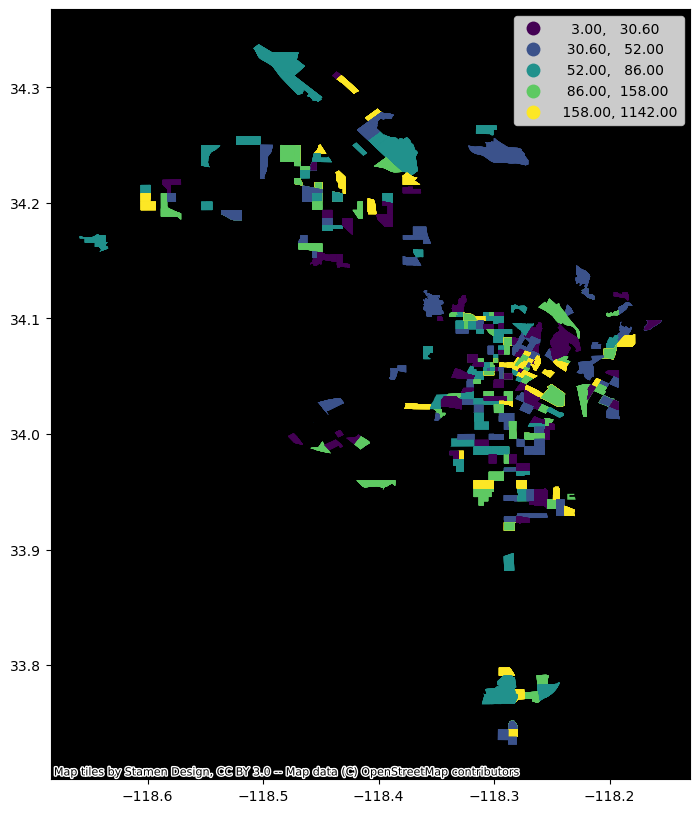

In [151]:
ax = LIHTCneighborhoods.plot(figsize=(12,10),
                 column='li_units_count',
                 legend=True, 
                 scheme='quantiles')
cx.add_basemap(ax = ax, source=cx.providers.Stamen.Toner)

In [131]:
LIHTCneighborhoods.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Not exactly sure why my map did not come out correctly with the basemap. I also ran into this error message:
- /opt/conda/lib/python3.10/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 28 is not valid for the current tile provider (valid zooms: 0 - 20).
    
I searched around and unsuccessfully attempted to fix this by reading from these pages
- https://gis.stackexchange.com/questions/378745/contextily-add-basemap-uses-wrong-extent-and-zoom-level 
- https://stackoverflow.com/questions/65071709/contextily-add-basemap-inferred-zoom-level-is-not-valid-and-changing-zoom-parame 